# Tutorial rápido de Python para Matemáticos

&copy; Ricardo Miranda Martins, 2022 - http://www.ime.unicamp.br/~rmiranda/

## Índice

1. [Introdução](1-intro.html) 
2. [Python é uma boa calculadora!](2-calculadora.html) [(código fonte)](2-calculadora.ipynb)
3. **[Resolvendo equações](3-resolvendo-eqs.html)**  [(código fonte)](3-resolvendo-eqs.ipynb)
4. [Gráficos](4-graficos.html)  [(código fonte)](4-graficos.ipynb)
5. [Sistemas lineares e matrizes](5-lineares-e-matrizes.html)  [(código fonte)](5-lineares-e-matrizes.ipynb)
6. [Limites, derivadas e integrais](6-limites-derivadas-integrais.html)  [(código fonte)](6-limites-derivadas-integrais.ipynb)
7. [Equações diferenciais](7-equacoes-diferenciais.html)  [(código fonte)](7-equacoes-diferenciais.ipynb)

# Resolvendo equações

A primeira coisa que a gente faz em um sistema computacional novo é resolver umas equações. Como faremos isso?

No futuro, o computador vai ler a nossa mente e saber exatamente o que a gente quer fazer. Até lá, teremos que nos preocupar com sintaxes. Vamos novamente carregar a biblioteca SymPy (essa linha é opcional, caso você tenha executado o comando anterior, que já carrega a SymPy como ```sp```).

In [11]:
import sympy as sp

O Python, como padrão, não sabe o que é x, y, z, etc. Temos que definir que essas letras serão reservadas para serem variáveis simbólicas. Isso é feito com o comando abaixo:

In [12]:
x, y = sp.symbols('x y')

Viu como usamos o comando ```sp.symbols```, com o prefixo ```sp```? Isso significa que estamos usando o comando ```symbols``` do pacote SymPy. Para resolver equações envolvendo $x,y$, vamos usar o comando ```solve```, que também está no pacote SymPy. Portanto, teremos que chamá-lo usando ```sp.solve```.

In [13]:
sp.solve(x+1)

[-1]

O comando ```sp.solve``` assume que você passou uma equação da forma "$\text{equacao}=0$" pra ele, e resolve para as variáveis envolvidas. Portanto, o comando acima resolve a equação $x+1=0$ com respeito à única variável envolvida, que é $x$. Portanto, é claro que se $x+1=0$ então $x=-1$.

Isso é muito importante: ao usar o comando ```sp.solve``` você sempre tem que se lembrar que a equação tem esse formato. Vamos experimentar isso novamente com algumas equações, procurando raízes de $x^2-0=0$ (cuidado com a notação: no Python você deve representar $x^n$ por ```x**n```).

In [14]:
sp.solve(x**2-9)

[-3, 3]

Contem uma mentirinha para vocês. O SymPy tem a opção de construir uma "equação" para a gente não precisar "passar tudo pro lado esquerdo". O comando para isso é o ```Eq```, lembrando que precisamos usar ```sp``` antes:

In [15]:
sp.solve(sp.Eq(x**2,9))

[-3, 3]

Vamos resolver mais algumas equações.

In [16]:
sp.solve(x**7-x**6+x**3-9)

[CRootOf(x**7 - x**6 + x**3 - 9, 0),
 CRootOf(x**7 - x**6 + x**3 - 9, 1),
 CRootOf(x**7 - x**6 + x**3 - 9, 2),
 CRootOf(x**7 - x**6 + x**3 - 9, 3),
 CRootOf(x**7 - x**6 + x**3 - 9, 4),
 CRootOf(x**7 - x**6 + x**3 - 9, 5),
 CRootOf(x**7 - x**6 + x**3 - 9, 6)]

Ops! O que aconteceu aqui? Que resposta estranha é essa? Cadê as raízes??????

Tentamos usar o SymPy para encontrar raízes de um polinômio de grau 7 e não deu certo. Como você deve saber, o jovem Galois provou que raízes de polinômios de grau $\geq 5$ não podem ser expressas por radicais envolvendo coeficientes do polinômio, o que popularmente significa que "não tem fórmula para as raízes". A resposta, no entanto, é coerente: ele diz que as soluções de $$x^7-x^6+x^3-9=0$$ são uma das 7 raízes desse polinômio. Tá errado? Não. Adianta de alguma coisa? Também não.

Nesse caso, devemos partir para a busca de soluções numéricas. O SymPy tem um comando parecido com o ```solve```, só que procura soluções de forma numérica: o ```nsolve```. A sintaxe para encontrar uma solução de $F(x)=0$, com o chute inicial para a solução sendo $x_0$ é ```sp.nsolve(F,x0)```. Note que $x_0$ não precisa ser uma solução, é só uma estimativa inicial.

In [17]:
sp.nsolve(x**7-x**6+x**3-9,1)

1.49827540261252

Encontramos uma solução! Um dos "problemas" do ```nsolve``` é que ele só procura uma solução de cada vez, dependendo do ponto inicial dado. Na dúvida, você pode dar uma "conferida" fazendo o gráfico. Falaremos mais sobre gráficos depois, mas fica aqui um gostinho.

Usaremos o próprio comando de plotar do SymPy. Ele não é o que de melhor existe no Python para plotar gráficos, mas é bem eficiente para coisas simples.

Abaixo plotamos o gráfico da função $y=x^7-x^6+x^3-9$, com $x\in[-2,2]$ e limitamos o eixo $y$ ao intervalo $-50,50$.

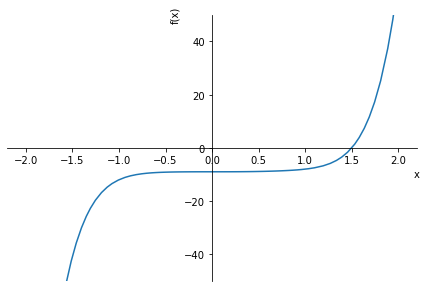

In [18]:
x = sp.symbols('x')
sp.plot(x**7-x**6+x**3-9,(x,-2,2),ylim=[-50,50])

Olhando o gráfico, parece que a solução que achamos acima é mesmo uma solução mesmo, né?

Vamos continuar resolvendo equações. Equações envolvendo mais que uma variável, que são em geral difíceis de serem resolvidas, ficam fáceis no Python:

In [19]:
sp.solve((x**2+y**2+x-10,x+y-2),(x,y),dict=True)

[{x: 3/4 - sqrt(57)/4, y: 5/4 + sqrt(57)/4},
 {x: 3/4 + sqrt(57)/4, y: 5/4 - sqrt(57)/4}]

Não se iluda com o comando acima. Em geral, para muitas equações e muitas variáveis, será preciso pedir soluções numéricas, com o ```nsolve```. Você pode mudar o formato da resposta usando a opção ```dict```, e também pode especificar o número de casas decimais da resposta com a opção ```prec```:

In [20]:
sp.nsolve((x**2+y**2+x-10,x+y-2),(x,y),[1,1],prec=30)

Matrix([
[  2.63745860881768742430917120174],
[-0.637458608817687424309171201737]])

In [21]:
sp.nsolve((x**2+y**2+x-10,x+y-2),(x,y),[1,1],dict=True,prec=30)

[{x: 2.63745860881768742430917120174, y: -0.637458608817687424309171201737}]

Ao invés de procurar soluções para $F(x)=0$, podemos estar interessados em calcular $F(x_0)$ para algum valor de $x_0$. Em muitos casos, não precisamos definir $F$ como uma função, ela pode estar definida como uma expressão e daí pedir para o Python substituir os valores, como por exemplo no comando abaixo, que define $F=x^2+y^3-2$ e calcula $F(1,2)$.

In [22]:
x, y = sp.symbols('x y')
F=x**2+y**3-2
F.subs(x,1).subs(y,2)

7

Para armazenar o valor de uma expressão, não precisamos declarar antes como símbolo. E depois podemos usar em contas, normalmente:

In [23]:
k=F.subs(x,1).subs(y,2)
k**2

49

O Python, assim como a maioria dos sistemas computacionais, mantém um comando especial para sistemas linares. No caso do SymPy, é o ```linsolve```. Os três comandos abaixo dão a mesma resposta, apesar de usarem métodos diferentes para obter a solução (note que cada saída é também formatada de uma forma):

In [24]:
sp.linsolve((x+y-1,x-y-3),(x,y))

{(2, -1)}

In [25]:
sp.solve((x+y-1,x-y-3),(x,y))

{x: 2, y: -1}

In [26]:
sp.nsolve((x+y-1,x-y-3),(x,y),[1,1],prec=5)

Matrix([
[ 2.0],
[-1.0]])

Por fim, vamos resolver um sistema de equações com o ```nsolve``` e depois entender geometricamente o que está acontecendo. Compare as soluções que encontramos com a figura que foi plotada. O comando ```plot_implicit``` plota curvas dadas implicitamente, e usamos o ```Or``` para indicar que são duas curvas.

In [27]:
sp.nsolve((x**5+y**6+x**3-1,x+y-1),(x,y),[0.5,0],dict=True)

[{x: 0.837615759482675, y: 0.162384240517325}]

In [28]:
sp.nsolve((x**5+y**6+x**3-1,x+y-1),(x,y),[1,2],dict=True)

[{x: -1.12228828894446e-23, y: 1.00000000000000}]

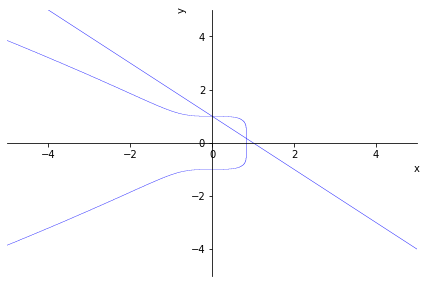

In [29]:
sp.plot_implicit(sp.Or(sp.Eq(x**5+y**6+x**3,1),sp.Eq(x+y,1)))

## Encontrar soluções de equações? Ideias simples podem funcionar.

Suponha que você queira achar uma solução para a equação $f(x)=0$. O que é a primeira coisa que você pensa? Matemáticos costumam pensar: será que existe alguma solução?

Faz sentido: quando você quer procurar uma item perdido pela casa, antes de começar a procurar num cômodo, você primeiro pondera se existe mesmo alguma chance dele estar ali. Quem tem filhos sabe que essa lógica nem sempre funciona, e é comum encontrar peças de Lego em lugares nunca antes imaginados, mas vamos continuar com nosso raciocínio.

Em todo caso, vamos pensar sobre condições para existência de solução para $f(x)=0$. Suponha que $f(x)$ seja uma função "boa", o que para a gente no momento significa que ela é contínua e definida num intervalo fechado. Em resumo, ela é daquelas funções que você consegue fazer o gráfico sem tirar o lápis do papel. 

Suponha que existam dois números $x_1$ e $x_2$, com a propriedade de que $f(x_1)$ e $f(x_2)$ tem sinais contrários, por exemplo $f(x_1)<0$ e $f(x_2)>0$. Então, ao fazermos o gráfico de $y=f(x)$, teremos os pontos $(x_1,f(x_1))$ e $(x_2,f(x_2))$ em lados opostos do eixo $x$, um abaixo e outro acima do eixo.

Ora, o gráfico de $y=f(x)$ tem que, de alguma forma, passar por esses dois pontos! Faça aí uns gráficos em uma folha de papel e se convença de que a única possibilidade é existir um ponto $x_0$, entre $x_1$ e $x_2$, de modo que $f(x_0)=0$. Se você está convencido disso, saiba que pode ser que você tenha provado o Teorema de Bolzano, ainda que sem formalismo.

O resumo é que se você sabe que $f(x_1)<0$ e $f(x_2)>0$, então existe $x_0$ entre $x_1$ e $x_2$ que resolve a equação $f(x)=0$. Como calcular $x_0$, ou pelo menos uma aproximação para ele? Uma possibilidade é usar o método da bisseção (detalhes [aqui](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/sdeduv-metodo_da_bissecao.html)), que vamos explicar brevemente.

Esse método usa o seguinte argumento: sejam $a,b$ tais que $f(a)<0$ e $f(b)>0$. Então sabemos que existe uma solução para $f(x)$ com $x\in[a,b]$. Pegue um outro ponto desse intervalo, digamos o ponto médio $x_0=(a+b)/2$. Se $f(x_0)=0$, encontramos um zero. Se $f(x_0)\neq 0$, então temos duas possibilidades:
1. ou $f(x_0)>0$ ou
2. $f(x_0)<0$.

No primeiro caso, repetindo o argumento anterior, devemos ter uma solução de $f(x)=0$ no intervalo $[a,x_0]$, e no segundo caso teremos uma solução para $f(x)=0$ no intervalo $[x_0,b]$. Agora faça tudo novamente com um desses intervalos. A ideia é que em cada passo você irá confinar a solução a um intervalo menor, encontrando aproximações cada vez melhores para a solução da equação.

Antes do código, vamos fazer um exemplo "manual".

Seja $f(x)=x^7+x-1$. Queremos resolver $f(x)=0$. Essa função é contínua. Temos que $f(0)=-1$ e $f(1)=1$. Então deve existir alguma solução para $f(x)=0$ no intervalo $[0,1]$.

- $f(1/2)=(1/2)^7+(1/2)-1=-63/128<0$

Portanto, existe uma solução entre $[1/2,1]$ e já diminuímos o intervalo onde está a solução para um de comprimento $1/2$. Calculamos novamente o valor da função no ponto médio desse intervalo:

- $f(3/4)=-1909/16384<0$

Como $f(3/4)<0$ e $f(1)>0$, temos uma solução para $f(x)=0$ no intervalo $[3/4,1]$. Vamos novamente calcular o valor da função no ponto médio:

- $f(7/8)=561399/2097152>0$


Como $f(7/8)>0$ e $f(3/4)<0$, temos uma solução para $f(x)=0$ no intervalo $[3/4,7/8]$. Vamos calcular novamente no ponto médio:

- $f(13/16)=12416869/268435456>0$

Assim, teremos uma solução para $f(x)=0$ no intervalo $[3/4,13/16]$, ou seja, entre $0,75$ e $0,8125$. Se continuarmos usando o método, chegaremos que uma boa aproximação para a solução é $x=0,7965...$. 

Note que, a cada passo, simplesmente calculamos o valor da função no ponto médio, comparamos com os extremos, e daí decidimos por um dos dois subintervalos. A única coisa que devemos decidir é quanto o algoritmo irá parar: isso pode ser feito após um número determinado de passos, ou quando o tamanho do intervalo já for suficiente. Por exemplo, se decidirmos parar sempre que o intervalo tiver comprimento menor que $10^{-(k+1)}$, teremos uma solução com precisão de $k$ casas decimais.

A implementação abaixo é a mesma do Mathematical Python, do Patrick Walls [(veja aqui)](https://personal.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/).

In [30]:
# a funcao vai pegar uma funcao f, extremos de um intervalo a, b e N será o
# número máximo de iterações que serão realizadas
def bisseccao(f,a,b,N):

    if f(a)*f(b) >= 0:
        print("Falha, escolha outro intervalo.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Solução encontrada!")
            return m_n
        else:
            print("O método falhou.")
            return None
    return (a_n + b_n)/2

# vamos testar com o nosso polinômio, fazendo 50 iterações no intervalo [0,1]
f = lambda x: x**7 +x - 1
bisseccao(f,0,1,50)

Solução encontrada!


0.7965443541284571

Veja que após 50 iterações, chegamos numa boa aproximação para a solução. Veja abaixo um gráfico da função $f(x)$, que "comprova" a existência do zero.

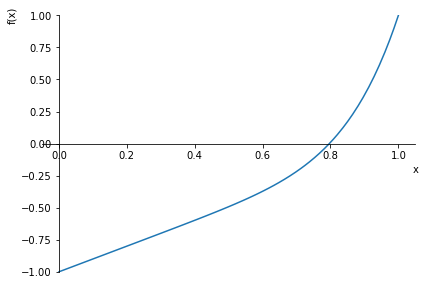

In [31]:
import sympy as sp
x = sp.symbols('x')
sp.plot(x**7+x-1,(x,0,1),ylim=[-1,1])